## IPEDS Data Exploration and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Read in School Information

In [2]:
directory = pd.read_csv("../data/ipeds_directory_info_2017_18.csv")

In [3]:
directory.head(3)

,school_id,institution_name,address,city,state_abbr,zipcode,fips_code,bea_region,employer_id,ope_id,...,cbsa_type,csa,necta,fips_county_code,county_name,congress_dist,longitude,latitude,data_fdbk_group,data_fdbk_custom
0,100654,Alabama A & M University,4900 Meridian Street,Normal,AL,35762,1,5,636001109,100200.0,...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,122,1
1,100663,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,636005396,105200.0,...,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,109,1
2,100690,Amridge University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,237034324,2503400.0,...,1,-2,-2,1101,Montgomery County,102,-86.174010,32.362609,141,2


In [4]:
## look at shape
directory.shape

(7153, 62)

In [5]:
directory.tail(3)

,school_id,institution_name,address,city,state_abbr,zipcode,fips_code,bea_region,employer_id,ope_id,...,cbsa_type,csa,necta,fips_county_code,county_name,congress_dist,longitude,latitude,data_fdbk_group,data_fdbk_custom
7150,491419,Health Career Institute- Lauderdale Lakes,4850 West Oakland Park Boulevard,Lauderdale Lakes,FL,33313-7268,12,5,-1,4182601.0,...,1,370,-2,12011,Broward County,1220,-80.216743,26.163240,-2,-2
7151,491428,National University College - Mayaguez Campus,"Road #2 Km.156.3, Bo. Sabalos",Mayaguez,PR,00680-0000,72,9,-1,2260605.0,...,1,364,-2,72097,Mayagüez Municipio,7298,-67.149938,18.184231,-2,-2
7152,491437,New Castle School of Trades - East Liverpool C...,129 E. 5th Street,East Liverpool,OH,43920-3025,39,3,-1,778003.0,...,2,566,-2,39029,Columbiana County,3906,-80.578398,40.619042,-2,-2


In [6]:
## count of nulls
#directory.isna().sum()

In [7]:
directory.columns

Index(['school_id', 'institution_name', 'address', 'city', 'state_abbr',
       'zipcode', 'fips_code', 'bea_region', 'employer_id', 'ope_id',
       'ope_title_iv', 'app_url', 'net_price_url', 'ath_url', 'sector',
       'inst_level', 'control', 'highest_offer', 'ug_offer', 'grad_offer',
       'highest_degree', 'deg_grant_status', 'histor_black', 'has_hospital',
       'medical_degree', 'tribal_coll', 'locale', 'open_public', 'act_status',
       'new_id', 'year_deleted', 'date_closed', 'curr_year_active', 'post_sec',
       'pse_flag', 'pse_t4_flag', 'report_method', 'institute_cat',
       'cc_15_basic', 'cc_ip_ug', 'cc_ip_grad', 'cc_ug_profile',
       'cc_enroll_profile', 'cc_size_set', 'cc_basic', 'carnegie',
       'land_grant_inst', 'inst_size', 'multi_campus_org', 'multi_campus_name',
       'multi_campus_id', 'cbsa', 'cbsa_type', 'csa', 'necta',
       'fips_county_code', 'county_name', 'congress_dist', 'longitude',
       'latitude', 'data_fdbk_group', 'data_fdbk_custom'],


## Read in Admissions Information

In [8]:
admissions_cond = pd.read_csv("../data/ipeds_admissions_2017_18.csv")

In [9]:
admissions_cond.head(3)

,school_id,cond_gpa,cond_two_rank,cond_three_record,cond_college_prep,cond_recommend,cond_demo_comp,cond_test_scores,cond_toefl,cond_other_test,...,sat_verb_25,sat_verb_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_eng_25,act_eng_75,act_math_25,act_math_75
0,100654,1,2,1,2,3,2,1,1,3,...,365.0,485.0,360.0,495.0,16.0,19.0,14.0,20.0,15.0,18.0
1,100663,1,3,1,1,3,3,1,3,3,...,440.0,630.0,550.0,740.0,21.0,28.0,22.0,31.0,21.0,26.0
2,100706,1,2,1,1,3,2,1,1,3,...,550.0,660.0,530.0,670.0,25.0,31.0,25.0,33.0,24.0,29.0


In [10]:
## How many options in entrance considerations? How many schools stress each the most out of 7153 schools.
admissions_cond['cond_gpa'].value_counts()

1    1557
3     266
2     193
5      59
Name: cond_gpa, dtype: int64

In [11]:
admissions_cond['cond_test_scores'].value_counts()

1    1212
3     441
2     279
5     143
Name: cond_test_scores, dtype: int64

In [12]:
admissions_cond['cond_college_prep'].value_counts()

2    821
1    622
3    559
5     73
Name: cond_college_prep, dtype: int64

## What these "conditions" codes mean:
- 1 = Required
- 2 = Considered but not Required
- 3 = Recommended
- 4 = Neither Required nor Recommended
- 5 = Not Reported

## Added columns for sat_comp_25 and sat_comp_75  as these were not in database

In [13]:
admissions_cond['sat_comp_25'] = admissions_cond['sat_verb_25'] + admissions_cond['sat_math_25']
admissions_cond['sat_comp_75'] = admissions_cond['sat_verb_75'] + admissions_cond['sat_math_75']

## Some EDA on this dataset

In [14]:
## look at shape
admissions_cond.shape

(2075, 41)

In [15]:
## look at nulls
admissions_cond.isna().sum()

school_id              0
cond_gpa               0
cond_two_rank          0
cond_three_record      0
cond_college_prep      0
cond_recommend         0
cond_demo_comp         0
cond_test_scores       0
cond_toefl             0
cond_other_test        0
applicants_total       0
applicants_men         2
applicants_women       2
admiss_total          28
admiss_men           106
admiss_women         106
enrollment            32
enroll_men           116
enroll_women         109
enroll_ft             45
enroll_ft_men        140
enroll_ft_women      129
enroll_pt            545
enroll_pt_men        604
enroll_pt_women      559
sat_number           738
sat_percent          740
act_number           741
act_percent          741
sat_verb_25          836
sat_verb_75          836
sat_math_25          836
sat_math_75          836
act_comp_25          779
act_comp_75          779
act_eng_25           859
act_eng_75           859
act_math_25          859
act_math_75          859
sat_comp_25          836


## Read in derived admissions stats

In [16]:
admissions_derived = pd.read_csv("../data/ipeds_derived_admiss_stats_2017.csv")

In [17]:
admissions_derived.head(3)

,school_id,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,admit_yield_women,admit_yield_ft,yield_ft_men,yield_ft_women,admit_yield_pt,yield_pt_men,yield_pt_women
0,100654,90,88.0,91.0,17.0,19.0,15.0,17.0,19.0,15.0,0.0,0.0,0.0
1,100663,92,91.0,92.0,33.0,35.0,32.0,32.0,33.0,31.0,1.0,1.0,1.0
2,100706,81,84.0,77.0,37.0,42.0,32.0,37.0,41.0,31.0,0.0,0.0,0.0


In [18]:
admissions_derived.shape

(2047, 13)

Text(0.5, 1.0, 'Percentage of Applicants Accepted')

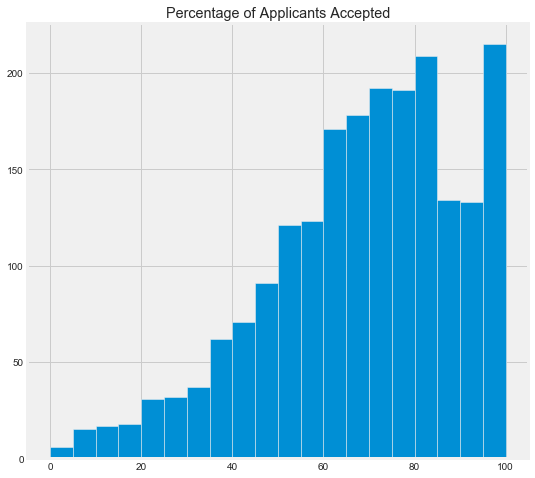

In [19]:
## Histgram of percent admitted
plt.figure(figsize=(8,8))
admissions_derived['perc_admit_total'].hist(bins=20)
plt.title('Percentage of Applicants Accepted')

Text(0.5, 1.0, 'Percentage of Accepted that Enrolled')

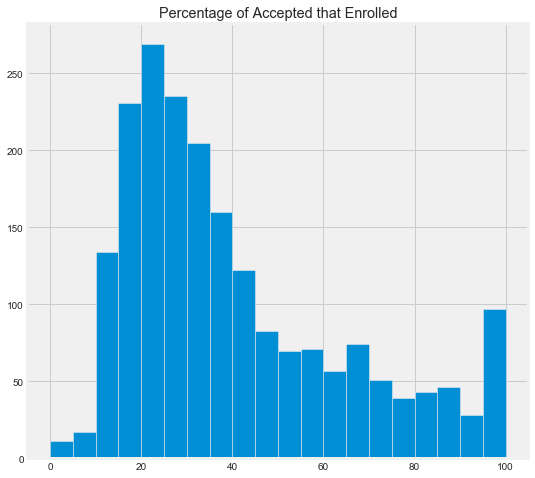

In [20]:
## Histgram of percent enrolled
plt.figure(figsize=(8, 8))
admissions_derived['admit_yield_total'].hist(bins=20)
plt.title('Percentage of Accepted that Enrolled')

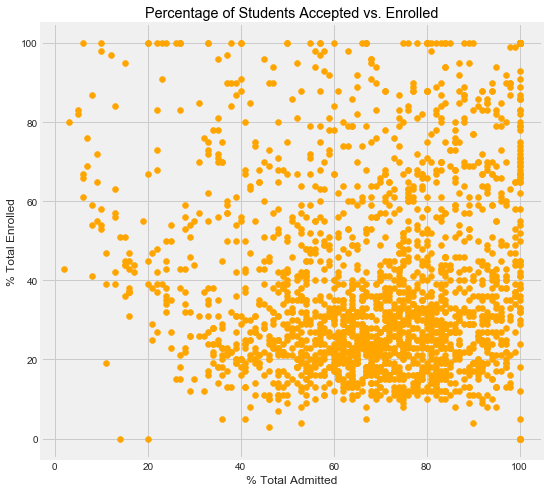

In [21]:
##Scatter Plot of Total Students accepted vs. enrolled
plt.figure(figsize=(8, 8))
plt.scatter('perc_admit_total', 'admit_yield_total', data = admissions_derived, c='orange')
plt.xlabel('% Total Admitted')
plt.ylabel('% Total Enrolled')
plt.title('Percentage of Students Accepted vs. Enrolled', color = 'black');

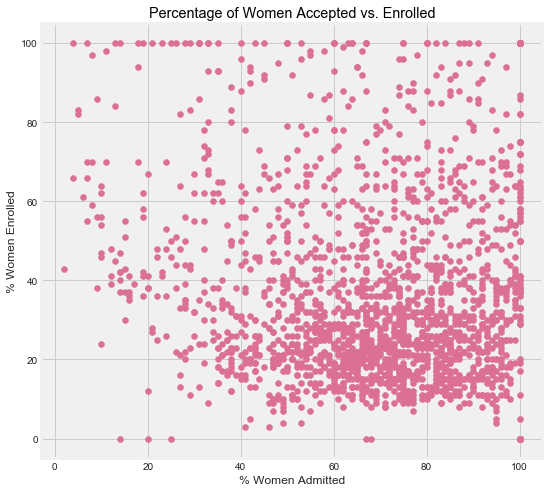

In [22]:
##Scatter Plot of Women accepted vs. enrolled
plt.figure(figsize=(8, 8))
plt.scatter('perc_admit_women', 'admit_yield_women', data = admissions_derived, c='palevioletred')
plt.xlabel('% Women Admitted')
plt.ylabel('% Women Enrolled')
plt.title('Percentage of Women Accepted vs. Enrolled', color = 'black');

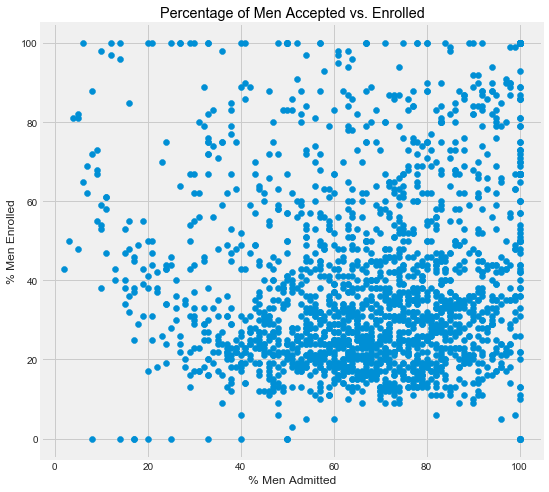

In [23]:
##Scatter Plot of Men accepted vs. enrolled
plt.figure(figsize=(8, 8))
plt.scatter('perc_admit_men', 'admit_yield_men', data = admissions_derived)
plt.xlabel('% Men Admitted')
plt.ylabel('% Men Enrolled')
plt.title('Percentage of Men Accepted vs. Enrolled', color = 'black');

## Schools that accept less than 35% of applicants...

In [24]:
## Some shools had zero acceptance so I filtered these out.
hi_selective_schools = admissions_derived.loc[(admissions_derived['perc_admit_total'] < 35) & (admissions_derived['perc_admit_total'] != 0)]

In [25]:
hi_selective_schools.shape

(152, 13)

In [26]:
hi_selective_schools.head(3)

,school_id,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,admit_yield_women,admit_yield_ft,yield_ft_men,yield_ft_women,admit_yield_pt,yield_pt_men,yield_pt_women
14,101587,28,30.0,27.0,22.0,23.0,21.0,22.0,23.0,21.0,0.0,0.0,0.0
64,110404,8,5.0,16.0,41.0,48.0,35.0,41.0,48.0,35.0,0.0,0.0,0.0
77,110583,28,27.0,29.0,23.0,24.0,23.0,23.0,23.0,23.0,0.0,1.0,0.0


In [27]:
hi_selective_schools.tail(3)

,school_id,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,admit_yield_women,admit_yield_ft,yield_ft_men,yield_ft_women,admit_yield_pt,yield_pt_men,yield_pt_women
2012,487092,29,29.0,29.0,12.0,13.0,11.0,12.0,13.0,11.0,0.0,0.0,0.0
2026,488819,6,6.0,7.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0
2028,489353,25,0.0,40.0,50.0,NaN,50.0,50.0,NaN,50.0,0.0,NaN,0.0


## Merge with basic school directory info so we have school name and loction...

In [28]:
## create subset of directory dataframe with just name and location
basic_school_info = directory[['school_id', 'institution_name', 'address', 'city', 'state_abbr', 'zipcode']]

In [29]:
basic_school_info.head(3)

,school_id,institution_name,address,city,state_abbr,zipcode
0,100654,Alabama A & M University,4900 Meridian Street,Normal,AL,35762
1,100663,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,35294-0110
2,100690,Amridge University,1200 Taylor Rd,Montgomery,AL,36117-3553


In [30]:
## merge with hi_selective_schools
hi_selective_schools = pd.merge(basic_school_info, hi_selective_schools, how = 'right', on = 'school_id')

In [31]:
hi_selective_schools.head(3)

,school_id,institution_name,address,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,admit_yield_women,admit_yield_ft,yield_ft_men,yield_ft_women,admit_yield_pt,yield_pt_men,yield_pt_women
0,101587,University of West Alabama,Station One,Livingston,AL,35470,28,30.0,27.0,22.0,23.0,21.0,22.0,23.0,21.0,0.0,0.0,0.0
1,110404,California Institute of Technology,1200 E California Blvd,Pasadena,CA,91125,8,5.0,16.0,41.0,48.0,35.0,41.0,48.0,35.0,0.0,0.0,0.0
2,110583,California State University-Long Beach,1250 Bellflower Blvd,Long Beach,CA,90840-0115,28,27.0,29.0,23.0,24.0,23.0,23.0,23.0,23.0,0.0,1.0,0.0


In [32]:
hi_selective_schools.tail(3)

,school_id,institution_name,address,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,admit_yield_women,admit_yield_ft,yield_ft_men,yield_ft_women,admit_yield_pt,yield_pt_men,yield_pt_women
149,487092,Emory University-Oxford College,801 Emory Street,Oxford,GA,30054,29,29.0,29.0,12.0,13.0,11.0,12.0,13.0,11.0,0.0,0.0,0.0
150,488819,The Colburn Conservatory of Music,200 S. Grand Avenue,Los Angeles,CA,90012,6,6.0,7.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0
151,489353,Chamberlain University-California,10971 Sun Center,Rancho Cordova,CA,95670,25,0.0,40.0,50.0,NaN,50.0,50.0,NaN,50.0,0.0,NaN,0.0


In [33]:
hi_selective_schools.shape

(152, 18)

## Website used for highly selective school criteria. Used second category to pull first two groups of schools.
https://www.collegetransitions.com/college-selectivity/#:~:text=EXTREMELY%20SELECTIVE%20colleges%20accept%20fewer,score%20of%20at%20least%201340.

## Define "highly selective" as all schools that meet these conditions: 
- Accept fewer than 35% of all applicants,
- AND possess an average composite ACT (25%tile) score of at least 29 
- OR an average combined SAT (25%tile) score of at least 1340.

In [34]:
test_scores = admissions_cond[['school_id', 'sat_comp_25', 'sat_comp_75','sat_verb_25', 'sat_verb_75', 'sat_math_25', 'sat_math_75', 
                              'act_comp_25', 'act_comp_75', 'act_eng_25', 'act_eng_75', 'act_math_25', 'act_math_75']]

### Merge in the test score data

In [35]:
hi_selective_schools = pd.merge(hi_selective_schools, test_scores, how = 'left', on = 'school_id')

In [36]:
hi_selective_schools.head(3)

,school_id,institution_name,address,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,...,sat_verb_25,sat_verb_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_eng_25,act_eng_75,act_math_25,act_math_75
0,101587,University of West Alabama,Station One,Livingston,AL,35470,28,30.0,27.0,22.0,...,440.0,520.0,420.0,500.0,18.0,23.0,17.0,24.0,16.0,22.0
1,110404,California Institute of Technology,1200 E California Blvd,Pasadena,CA,91125,8,5.0,16.0,41.0,...,750.0,790.0,780.0,800.0,34.0,35.0,34.0,36.0,35.0,36.0
2,110583,California State University-Long Beach,1250 Bellflower Blvd,Long Beach,CA,90840-0115,28,27.0,29.0,23.0,...,510.0,610.0,510.0,620.0,20.0,26.0,19.0,26.0,19.0,27.0


In [37]:
# hi_selective_schools.isna().sum()

## Now filter for the test score criteria

In [38]:
hi_schools_with_scores = hi_selective_schools.loc[(hi_selective_schools['act_comp_25'] >= 29.0)|(hi_selective_schools['sat_comp_25'] >= 1340.0)]

In [39]:
hi_schools_with_scores.shape

(61, 30)

In [40]:
hi_schools_with_scores.head(3)

,school_id,institution_name,address,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,...,sat_verb_25,sat_verb_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_eng_25,act_eng_75,act_math_25,act_math_75
1,110404,California Institute of Technology,1200 E California Blvd,Pasadena,CA,91125,8,5.0,16.0,41.0,...,750.0,790.0,780.0,800.0,34.0,35.0,34.0,36.0,35.0,36.0
3,110635,University of California-Berkeley,200 California Hall,Berkeley,CA,94720,17,15.0,19.0,44.0,...,630.0,720.0,630.0,760.0,30.0,34.0,29.0,35.0,28.0,35.0
4,110662,University of California-Los Angeles,405 Hilgard Ave,Los Angeles,CA,90095-1405,16,15.0,17.0,37.0,...,620.0,710.0,600.0,740.0,29.0,34.0,28.0,35.0,27.0,34.0


In [41]:
hi_schools_with_scores.reset_index(drop=True)

,school_id,institution_name,address,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,...,sat_verb_25,sat_verb_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_eng_25,act_eng_75,act_math_25,act_math_75
0,110404,California Institute of Technology,1200 E California Blvd,Pasadena,CA,91125,8,5.0,16.0,41.0,...,750.0,790.0,780.0,800.0,34.0,35.0,34.0,36.0,35.0,36.0
1,110635,University of California-Berkeley,200 California Hall,Berkeley,CA,94720,17,15.0,19.0,44.0,...,630.0,720.0,630.0,760.0,30.0,34.0,29.0,35.0,28.0,35.0
2,110662,University of California-Los Angeles,405 Hilgard Ave,Los Angeles,CA,90095-1405,16,15.0,17.0,37.0,...,620.0,710.0,600.0,740.0,29.0,34.0,28.0,35.0,27.0,34.0
3,112260,Claremont McKenna College,500 E 9th St,Claremont,CA,91711-6400,10,11.0,10.0,53.0,...,660.0,740.0,680.0,770.0,30.0,34.0,30.0,35.0,28.0,34.0
4,115409,Harvey Mudd College,301 Platt Blvd.,Claremont,CA,91711,15,10.0,28.0,36.0,...,720.0,770.0,750.0,800.0,33.0,35.0,33.0,35.0,33.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,234076,University of Virginia-Main Campus,1827 University Avenue,Charlottesville,VA,22903-2628,27,26.0,28.0,38.0,...,660.0,740.0,650.0,760.0,29.0,33.0,30.0,35.0,28.0,33.0
57,234207,Washington and Lee University,204 West Washington Street,Lexington,VA,24450-2116,22,22.0,22.0,39.0,...,680.0,740.0,670.0,750.0,31.0,33.0,31.0,35.0,28.0,33.0
58,243744,Stanford University,unknown,Stanford,CA,94305,5,4.0,5.0,82.0,...,690.0,760.0,700.0,780.0,32.0,35.0,33.0,36.0,30.0,35.0
59,441982,Franklin W Olin College of Engineering,1000 Olin Way,Needham,MA,02492-1200,13,8.0,28.0,63.0,...,710.0,770.0,740.0,800.0,33.0,35.0,33.0,35.0,31.0,35.0


In [42]:
hi_schools_with_scores.sort_values(by = ['perc_admit_total'])

,school_id,institution_name,address,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,...,sat_verb_25,sat_verb_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_eng_25,act_eng_75,act_math_25,act_math_75
51,166027,Harvard University,Massachusetts Hall,Cambridge,MA,2138,5,5.0,5.0,83.0,...,730.0,790.0,730.0,800.0,32.0,35.0,34.0,36.0,31.0,35.0
128,243744,Stanford University,unknown,Stanford,CA,94305,5,4.0,5.0,82.0,...,690.0,760.0,700.0,780.0,32.0,35.0,33.0,36.0,30.0,35.0
73,190150,Columbia University in the City of New York,West 116 St and Broadway,New York,NY,10027,6,7.0,6.0,61.0,...,710.0,780.0,730.0,800.0,33.0,35.0,33.0,35.0,30.0,35.0
67,186131,Princeton University,1 Nassau Hall,Princeton,NJ,08544-0070,6,6.0,7.0,66.0,...,710.0,780.0,720.0,790.0,31.0,35.0,33.0,35.0,30.0,35.0
52,166683,Massachusetts Institute of Technology,77 Massachusetts Avenue,Cambridge,MA,02139-4307,7,5.0,11.0,76.0,...,720.0,770.0,770.0,800.0,33.0,35.0,34.0,36.0,34.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,233374,University of Richmond,28 Westhampton Way,University of Richmond,VA,23173,33,35.0,32.0,24.0,...,630.0,710.0,640.0,750.0,29.0,32.0,NaN,NaN,NaN,NaN
14,123165,Scripps College,1030 North Columbia Avenue,Claremont,CA,91711-3905,33,NaN,33.0,34.0,...,660.0,730.0,630.0,730.0,29.0,33.0,31.0,35.0,27.0,32.0
50,165015,Brandeis University,415 South St,Waltham,MA,02454-9110,34,31.0,36.0,21.0,...,630.0,710.0,650.0,760.0,29.0,33.0,29.0,34.0,28.0,34.0
96,203535,Kenyon College,Kenyon College,Gambier,OH,43022,34,32.0,35.0,24.0,...,640.0,730.0,623.0,730.0,29.0,33.0,29.0,35.0,26.0,31.0


In [43]:
## Average act_comp_25
hi_schools_with_scores['act_comp_25'].mean()

30.80327868852459

In [44]:
## Average act_comp_75
hi_schools_with_scores['act_comp_75'].mean()

33.85245901639344

In [45]:
## Average sat_comp_25
hi_schools_with_scores['sat_comp_25'].mean()

1364.0655737704917

In [46]:
## Average sat_comp_75
hi_schools_with_scores['sat_comp_75'].mean()

1525.4098360655737

## Export subsets as csv files

In [47]:
# export hi_schools_with_scores as csv
##hi_schools_with_scores.to_csv('highly_selective.csv')

In [48]:
basic_school_info.to_csv('basic_school_info.csv')

## Use .map to create a new column using "control" for public, private non-profit, etc. 

In [49]:
# create a dictionary from "Control" responses
control_dict = {1:'Public',
               2:'Private Non-Profit',
               3:'Private For Profit',
               -3:'N/A'}
# make new column and fill
directory['school_type']= directory['control'].map(control_dict)

## Create new columns with US geographical regions, locales, and school size:

In [50]:
# create dictionary from "bea_region" responses
regions_dict = {1:'New England',
               2:'Mid East',
               3:'Great Lakes',
               4:'Plains',
               5:'Southeast',
               6:'Southwest',
               7:'Rocky Mountains',
               8:'Far West',
               9:'Outlying Areas',
               -3:'N/A'}
# make new column and fill
directory['geo_region']= directory['bea_region'].map(regions_dict)

In [51]:
# create dictionary for 'locale' responses
locale_dict = {11:'City, Large', 12:'City, Midsize', 13:'City, Small',
              21:'Suburb, Large', 22:'Suburb, Midsize', 23:'Suburb, Small',
              31: 'Town, Fringe', 32:'Town, Distant', 33:'Town, Remote',
              41:'Rural, Fringe', 42:'Rural, Distant', 43:'Rural, Remote'}
# make new column and fill
directory['locale_type'] = directory['locale'].map(locale_dict)

In [52]:
# create a dictionary from "inst_size" responses
size_dict = {1:'<1000',
            2:'1000-4999',
            3:'5000-9999',
            4:'10,000-19,999',
            5:'20,000+',
            -1:'Not Reported',
            -2:'N/A'}
directory['school_size']= directory['inst_size'].map(size_dict)

In [53]:
## drop the old columns and several I don't need
directory.drop(columns=['control', 'bea_region', 'locale', 'inst_size', 'ope_title_iv', 
                        'csa', 'necta', 'employer_id', 'ope_id'])

,school_id,institution_name,address,city,state_abbr,zipcode,fips_code,app_url,net_price_url,ath_url,...,county_name,congress_dist,longitude,latitude,data_fdbk_group,data_fdbk_custom,school_type,geo_region,locale_type,school_size
0,100654,Alabama A & M University,4900 Meridian Street,Normal,AL,35762,1,https://ssb.aamu.edu/PROD/bwskalog.P_DispLoginNon,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,www.aamu.edu/administrativeoffices/irpsp/insti...,...,Madison County,105,-86.568502,34.783368,122,1,Public,Southeast,"City, Midsize",5000-9999
1,100663,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,https://idm.uab.edu/myuab/login?from=ugadmapp,uab.studentaidcalculator.com/survey.aspx,www.uab.edu/registrar/students,...,Jefferson County,107,-86.799345,33.505697,109,1,Public,Southeast,"City, Midsize","20,000+"
2,100690,Amridge University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,https://www2.amridgeuniversity.edu/Amridge/Log...,www2.amridgeuniversity.edu:9091/,NaN,...,Montgomery County,102,-86.174010,32.362609,141,2,Private Non-Profit,Southeast,"City, Midsize",<1000
3,100706,University of Alabama in Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,register.uah.edu,finaid.uah.edu/,www.uah.edu/heoa,...,Madison County,105,-86.640449,34.724557,112,2,Public,Southeast,"City, Midsize",5000-9999
4,100724,Alabama State University,915 S Jackson Street,Montgomery,AL,36104-0271,1,www.alasu.edu/admissions/undergrad-admissions/...,www.alasu.edu/cost-aid/forms/calculator/index....,www.alasu.edu/search-results/index.aspx,...,Montgomery County,107,-86.295677,32.364317,131,1,Public,Southeast,"City, Midsize",1000-4999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,491385,Wright Institute (The) -,2501 9th Street,Berkeley,CA,94710-2254,6,NaN,NaN,NaN,...,Alameda County,613,-122.291518,37.860543,-2,-2,N/A,Far West,"City, Midsize",N/A
7149,491394,Edge Tech Academy,"8701 Bedford Euless Road, Suite 610",Hurst,TX,76053-3701,48,NaN,edgetechacademy.edu/NetPriceCalculatorAAI/npca...,NaN,...,Tarrant County,4812,-97.196111,32.834122,235,2,Private For Profit,Southwest,"Suburb, Large",<1000
7150,491419,Health Career Institute- Lauderdale Lakes,4850 West Oakland Park Boulevard,Lauderdale Lakes,FL,33313-7268,12,NaN,NaN,NaN,...,Broward County,1220,-80.216743,26.163240,-2,-2,N/A,Southeast,"Suburb, Large",N/A
7151,491428,National University College - Mayaguez Campus,"Road #2 Km.156.3, Bo. Sabalos",Mayaguez,PR,00680-0000,72,NaN,NaN,NaN,...,Mayagüez Municipio,7298,-67.149938,18.184231,-2,-2,N/A,Outlying Areas,"City, Small",N/A


In [54]:
directory.shape

(7153, 66)

## Filter directory df to exclude "Outlying Areas":
- Deletes American Samoa, Guam, Marianas, Marshall Is., Micronesia, Palau, Puerto Rico, & Virgin Islands 

In [55]:
directory_filtered = directory[directory['geo_region'] != 'Outlying Areas'] 

In [56]:
directory_filtered.shape

(6993, 66)

In [58]:
# export as csv
directory_filtered.to_csv('directory_filtered.csv')